## Project Description:

#### About
- There will be two datasets for this project—one for classification models and the second for regression models. 

#### Required Tasks
- Explore each data set using different descriptive and plotting methods. 
- Explore each dataset, check for missing data and apply proper data imputation methods. 
- Apply the same preprocessing techniques on the classification_test and regression_test. Note that these two datasets don't have target columns. 
- Find the best regression model among the list of models trained on the regression_train dataset. Use this model to predict the target values of the regression_test. 
- Find the best classification model. Use this model to predict the target values of the classification_test.

# Regression

### Data preparation

In [1]:
#Importing all the required libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

#### Reading files

In [2]:
#Importing the train & test dataset
df_RTr = pd.read_csv("train_regression.csv")
df_RTS = pd.read_csv("test_regression.csv")

In [3]:
#Exploring columns of training dataset
df_RTr

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,23.0,3.8,83.0,1.1,390.0,1.1,0.00,0.0,0.4,Autumn,No Holiday,Yes,379
1,14.0,24.0,47.0,2.3,520.0,11.9,2.87,0.0,0.0,Spring,No Holiday,Yes,1055
2,19.0,-7.1,33.0,2.0,1887.0,-20.6,0.00,0.0,0.0,Winter,No Holiday,Yes,122
3,12.0,12.3,97.0,0.8,238.0,11.8,0.14,2.0,0.0,Spring,No Holiday,Yes,11
4,4.0,3.6,70.0,0.8,1934.0,-1.3,0.00,0.0,0.0,Autumn,No Holiday,Yes,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6565,5.0,17.8,75.0,1.0,1210.0,NaN,0.00,0.0,0.0,Summer,NaN,Yes,306
6566,19.0,16.4,47.0,1.0,1694.0,5.0,0.00,0.0,0.0,Autumn,No Holiday,Yes,1968
6567,11.0,NaN,57.0,1.8,943.0,16.3,3.01,0.0,0.0,Summer,No Holiday,Yes,1066
6568,0.0,8.3,59.0,2.1,1912.0,0.7,0.00,0.0,0.0,Spring,No Holiday,Yes,401


#### Data prepartion 


In [4]:
#Check if there are any duplicated values
df_RTr[df_RTr.duplicated() == True].count()

Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
Rented Bike Count           0
dtype: int64

In [5]:
#lookung for null values
#All the columns have missing values except Rented Bike Count
df_RTr.isnull().sum()

Hour                        177
Temperature(C)              209
Humidity(%)                 210
Wind speed (m/s)            193
Visibility (10m)            190
Dew point temperature(C)    197
Solar Radiation (MJ/m2)     201
Rainfall(mm)                211
Snowfall (cm)               190
Seasons                     209
Holiday                     167
Functioning Day             196
Rented Bike Count             0
dtype: int64

<AxesSubplot:ylabel='Density'>

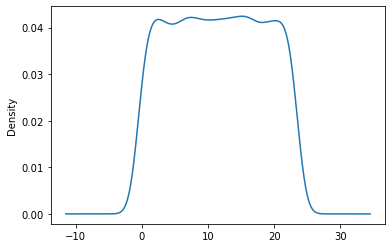

In [6]:
#Plotting the Hour column distribution to decide how to replace the missing values
#This distribution is neither normal nor skewed
#So, clustering is the choice to replace the missing values which it will be seen below
df_RTr['Hour'].plot(kind='kde')

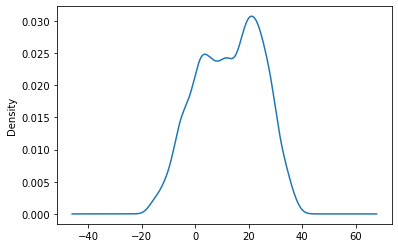

In [7]:
#Plotting the Temperature column distribution to decide how to replace the missing values
#As it's almost like a normal distribution, so replaced the missing values of this column will be with the mean
df_RTr['Temperature(C)'].plot(kind='kde')
meanht= df_RTr['Temperature(C)'].mean()
df_RTr['Temperature(C)']= df_RTr['Temperature(C)'].fillna(meanht)

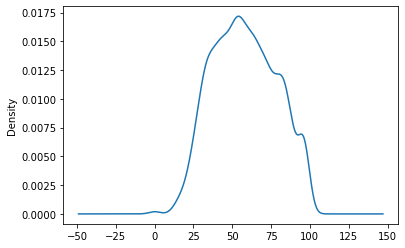

In [8]:
#Plotting the Humidity column distribution to decide how to replace the missing values
#As it's almost like a normal distribution, so replaced the missing values of this column will be with the mean
df_RTr['Humidity(%)'].plot(kind='kde')
meanhh= df_RTr['Humidity(%)'].mean()
df_RTr['Humidity(%)']= df_RTr['Humidity(%)'].fillna(meanhh)

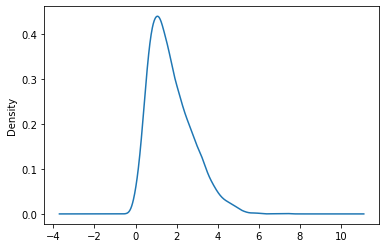

In [9]:
#Plotting the Wind speed (m/s) column distribution to decide how to replace the missing values
#As it's left skewed, best chice for replaced the missing values of this column is the median
df_RTr['Wind speed (m/s)'].plot(kind='kde')
medianw= df_RTr['Wind speed (m/s)'].median()
df_RTr['Wind speed (m/s)']= df_RTr['Wind speed (m/s)'].fillna(medianw)

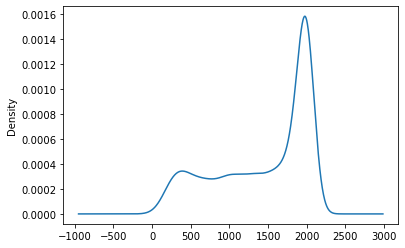

In [10]:
#Plotting the Visibility column distribution to decide how to replace the missing values
#As it's right skewed the missing values of this column will be replaced with the median
df_RTr['Visibility (10m)'].plot(kind='kde')
medianv= df_RTr['Visibility (10m)'].median()
df_RTr['Visibility (10m)']=df_RTr['Visibility (10m)'].fillna(medianv)

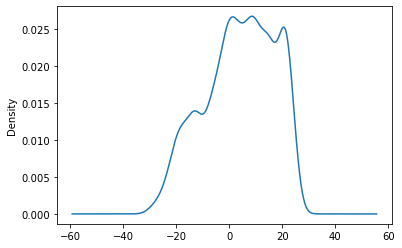

In [11]:
##Plotting the Dew point temperature(C) column distribution to decide how to replace the missing values
#As it's right skewed, so replaced the missing values of this column will be with the median
df_RTr['Dew point temperature(C)'].plot(kind='kde')
df_RTr['Dew point temperature(C)']=df_RTr['Dew point temperature(C)'].fillna(df_RTr['Dew point temperature(C)'].median())

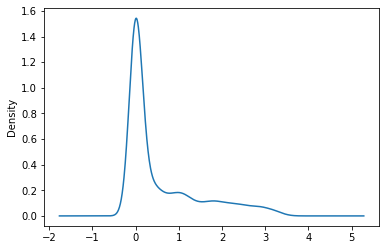

In [12]:
#Plotting the Solar Radiation (MJ/m2) column distribution to decide how to replace the missing values
#As it's left skewed, so replaced the missing values of this column with the median
df_RTr['Solar Radiation (MJ/m2)'].plot(kind='kde')
medians= df_RTr['Solar Radiation (MJ/m2)'].median()
df_RTr['Solar Radiation (MJ/m2)']=df_RTr['Solar Radiation (MJ/m2)'].fillna(medians)

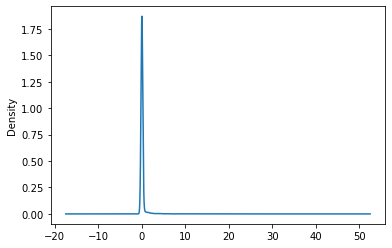

In [13]:
#Plotting the Rainfall(mm) column distribution to decide how to replace the missing values
#As it's left skewed, so replaced the missing values of this column with the median
df_RTr['Rainfall(mm)'].plot(kind='kde')
medians= df_RTr['Rainfall(mm)'].median()
df_RTr['Rainfall(mm)']=df_RTr['Rainfall(mm)'].fillna(medians)

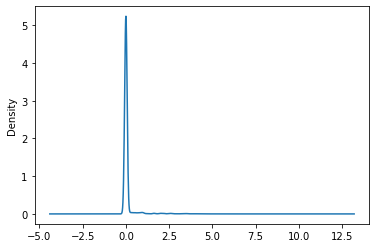

In [14]:
#Plotting the Snowfall (cm) column distribution to decide how to replace the missing values
#As it's left skewed, so replaced the missing values of this column with the median
df_RTr['Snowfall (cm)'].plot(kind='kde')
mediansn= df_RTr['Snowfall (cm)'].median()
df_RTr['Snowfall (cm)']= df_RTr['Snowfall (cm)'].fillna(mediansn)

In [15]:
#The column Holiday contains string which be in the moedl 
#it have to be transformed into a numerical one
#As it's a binomial column, it will be replaced by 1 for the most frequent value and 0 for the other value.
df_RTr['Holiday'].value_counts()

No Holiday    6082
Holiday        321
Name: Holiday, dtype: int64

In [16]:
#replaced 'No Holiday' with 1 & 'Holiday' with 0
df_RTr['Holiday'] = df_RTr['Holiday'].replace('No Holiday', 1)
df_RTr['Holiday'] = df_RTr['Holiday'].replace('Holiday', 0)

In [17]:
#As it's a binomial column, it will be replaced by 1 for the most frequent value and 0 for the other value.
df_RTr['Functioning Day'].value_counts()

Yes    6180
No      194
Name: Functioning Day, dtype: int64

In [18]:
#replaced 'Yes' with 1 & 'No' with 0
df_RTr['Functioning Day'] = df_RTr['Functioning Day'].replace('Yes', 1)
df_RTr['Functioning Day'] = df_RTr['Functioning Day'].replace('No', 0)

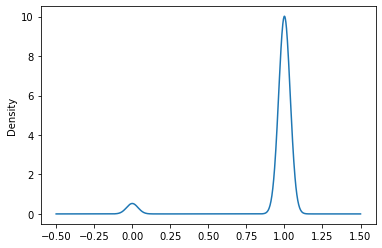

In [19]:
#Plotting the Holiday column distribution to decide how to replace the missing values
#As it's right skewed, replaced the missing values of this column with the median
df_RTr['Holiday'].plot(kind='kde')
medianh= df_RTr['Holiday'].median()
df_RTr['Holiday']= df_RTr['Holiday'].fillna(medianh)

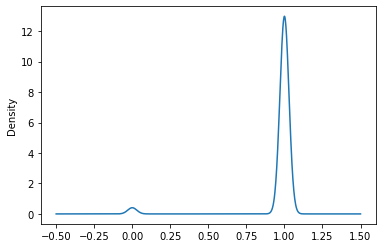

In [20]:
#Plotting the Functioning Day column distribution to decide how to replace the missing values
#As it's right skewed. replaced the missing values of this column with the median
df_RTr['Functioning Day'].plot(kind='kde')
medianh= df_RTr['Functioning Day'].median()
df_RTr['Functioning Day']= df_RTr['Functioning Day'].fillna(medianh)

In [21]:
# still have to fix Hour & Seasons column
df_RTr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6570 entries, 0 to 6569
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Hour                      6393 non-null   float64
 1   Temperature(C)            6570 non-null   float64
 2   Humidity(%)               6570 non-null   float64
 3   Wind speed (m/s)          6570 non-null   float64
 4   Visibility (10m)          6570 non-null   float64
 5   Dew point temperature(C)  6570 non-null   float64
 6   Solar Radiation (MJ/m2)   6570 non-null   float64
 7   Rainfall(mm)              6570 non-null   float64
 8   Snowfall (cm)             6570 non-null   float64
 9   Seasons                   6361 non-null   object 
 10  Holiday                   6570 non-null   float64
 11  Functioning Day           6570 non-null   float64
 12  Rented Bike Count         6570 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 667.4+ KB


In [22]:
#Setting Rented Bike Count column as our target column
X= df_RTr.drop('Rented Bike Count', axis=1)
y = df_RTr['Rented Bike Count']

In [23]:
#Our feature set X has 12 columns now
X.isnull().sum()

Hour                        177
Temperature(C)                0
Humidity(%)                   0
Wind speed (m/s)              0
Visibility (10m)              0
Dew point temperature(C)      0
Solar Radiation (MJ/m2)       0
Rainfall(mm)                  0
Snowfall (cm)                 0
Seasons                     209
Holiday                       0
Functioning Day               0
dtype: int64

### Scaling

In [24]:
#The feature set before scaling
X

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,23.0,3.800000,83.0,1.1,390.0,1.1,0.00,0.0,0.4,Autumn,1.0,1.0
1,14.0,24.000000,47.0,2.3,520.0,11.9,2.87,0.0,0.0,Spring,1.0,1.0
2,19.0,-7.100000,33.0,2.0,1887.0,-20.6,0.00,0.0,0.0,Winter,1.0,1.0
3,12.0,12.300000,97.0,0.8,238.0,11.8,0.14,2.0,0.0,Spring,1.0,1.0
4,4.0,3.600000,70.0,0.8,1934.0,-1.3,0.00,0.0,0.0,Autumn,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6565,5.0,17.800000,75.0,1.0,1210.0,4.9,0.00,0.0,0.0,Summer,1.0,1.0
6566,19.0,16.400000,47.0,1.0,1694.0,5.0,0.00,0.0,0.0,Autumn,1.0,1.0
6567,11.0,12.808175,57.0,1.8,943.0,16.3,3.01,0.0,0.0,Summer,1.0,1.0
6568,0.0,8.300000,59.0,2.1,1912.0,0.7,0.00,0.0,0.0,Spring,1.0,1.0


In [25]:
#As for now, the Seasons column is dropped because it has strings which can't be scaled
X= X.drop('Seasons', axis=1)

In [26]:
#Now the feature set looks like this before scaling
X

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day
0,23.0,3.800000,83.0,1.1,390.0,1.1,0.00,0.0,0.4,1.0,1.0
1,14.0,24.000000,47.0,2.3,520.0,11.9,2.87,0.0,0.0,1.0,1.0
2,19.0,-7.100000,33.0,2.0,1887.0,-20.6,0.00,0.0,0.0,1.0,1.0
3,12.0,12.300000,97.0,0.8,238.0,11.8,0.14,2.0,0.0,1.0,1.0
4,4.0,3.600000,70.0,0.8,1934.0,-1.3,0.00,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
6565,5.0,17.800000,75.0,1.0,1210.0,4.9,0.00,0.0,0.0,1.0,1.0
6566,19.0,16.400000,47.0,1.0,1694.0,5.0,0.00,0.0,0.0,1.0,1.0
6567,11.0,12.808175,57.0,1.8,943.0,16.3,3.01,0.0,0.0,1.0,1.0
6568,0.0,8.300000,59.0,2.1,1912.0,0.7,0.00,0.0,0.0,1.0,1.0


In [27]:
#As most of data distribution is not normal but skewed, chose MinMaxScaler to scale the dataset
#For each feature, each value is subtracted by the minimum value of the respective feature and then divided by the range of original maximum and minimum of the same feature
#MinMaxScaler ranges the values in between 0 & 1
#The highest value is replaced with 1 while the lowest value is replaced with 0
#Since I am gonna use clustering for Seasons & Hours column, it's a good practice to scale the data before clustering
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X),columns= X.columns)

In [28]:
#Now, it's time to deal with the Seasons column
#will add this column to the scaled dataset
X_train_scaled['Seasons']= df_RTr['Seasons']

In [29]:
#Printing a few rows
X_train_scaled

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons
0,1.000000,0.375000,0.846939,0.148649,0.181495,0.552265,0.000000,0.000000,0.045455,1.0,1.0,Autumn
1,0.608696,0.730634,0.479592,0.310811,0.247585,0.740418,0.815341,0.000000,0.000000,1.0,1.0,Spring
2,0.826087,0.183099,0.336735,0.270270,0.942552,0.174216,0.000000,0.000000,0.000000,1.0,1.0,Winter
3,0.521739,0.524648,0.989796,0.108108,0.104220,0.738676,0.039773,0.057143,0.000000,1.0,1.0,Spring
4,0.173913,0.371479,0.714286,0.108108,0.966446,0.510453,0.000000,0.000000,0.000000,1.0,1.0,Autumn
...,...,...,...,...,...,...,...,...,...,...,...,...
6565,0.217391,0.621479,0.765306,0.135135,0.598373,0.618467,0.000000,0.000000,0.000000,1.0,1.0,Summer
6566,0.826087,0.596831,0.479592,0.135135,0.844433,0.620209,0.000000,0.000000,0.000000,1.0,1.0,Autumn
6567,0.478261,0.533595,0.581633,0.243243,0.462633,0.817073,0.855114,0.000000,0.000000,1.0,1.0,Summer
6568,0.000000,0.454225,0.602041,0.283784,0.955262,0.545296,0.000000,0.000000,0.000000,1.0,1.0,Spring


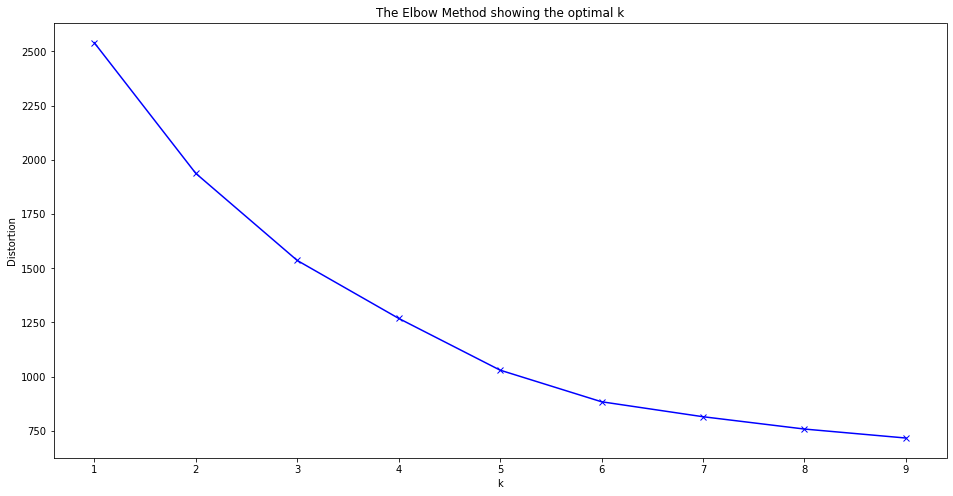

In [30]:
#Checking which number of cluster k is the best one using Elbow method 

X_kmeans = X_train_scaled.drop(['Seasons','Hour'], axis=1)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_kmeans)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
#Results show that 6 is the best K

In [31]:
#To make sure 6 is the best K let's try silhouette_score
for i in range(2,12):
    model_10 = KMeans(n_clusters= i, random_state = 0)

    # Train the model
    model_10 = model_10.fit_predict(X_kmeans)
    score = silhouette_score(X_kmeans, model_10)

    print("The cluster ",i,"\t has the score", score)
#Results show that 6 is the best K

The cluster  2 	 has the score 0.24872516666013986
The cluster  3 	 has the score 0.2721120975061884
The cluster  4 	 has the score 0.29656172597320607
The cluster  5 	 has the score 0.32058150827654386
The cluster  6 	 has the score 0.3379027516650796
The cluster  7 	 has the score 0.30341563505372415
The cluster  8 	 has the score 0.2593574700777224
The cluster  9 	 has the score 0.25869084472019593
The cluster  10 	 has the score 0.25377043397942556
The cluster  11 	 has the score 0.2528285244321359


In [32]:
#Initializing clustering
#Counter was imported to count the number of instances in each cluster
from collections import Counter
kmeans = KMeans(n_clusters=6, random_state=0).fit(X_kmeans)
print(Counter(kmeans.labels_))

Counter({4: 1747, 0: 1661, 1: 1637, 2: 1029, 3: 302, 5: 194})


In [33]:
#Printing the labels of the data
kmeans.labels_

array([0, 2, 1, ..., 2, 1, 0])

In [34]:
#X_train_scaled['Seasons'].iloc[kmeans.labels_ == 0] returned a data frame with all instances receiving label 0 in the KMeans clustering
X_train_scaled['Seasons'].iloc[kmeans.labels_ == 0].value_counts()             

Spring    581
Autumn    370
Winter    361
Summer    296
Name: Seasons, dtype: int64

In [35]:
#replaced the missing values in the resulting data frame with the most frequent value in the cluster which is Spring
X_train_scaled['Seasons'].iloc[kmeans.labels_ == 0]= X_train_scaled['Seasons'].iloc[kmeans.labels_ == 0].fillna('Spring' )

C:\Users\prokr\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [36]:
#No null value found
X_train_scaled['Seasons'].iloc[kmeans.labels_ == 0].isnull().sum()

0

In [37]:
#X_train_scaled['Seasons'].iloc[kmeans.labels_ == 1] returned a data frame with all instances receiving label 0 in the KMeans clustering
X_train_scaled['Seasons'].iloc[kmeans.labels_ == 1].value_counts()               

Winter    1052
Spring     267
Autumn     263
Name: Seasons, dtype: int64

In [38]:
#replaced the missing values in the resulting data frame with the most frequent value in the cluster which is Winter
X_train_scaled['Seasons'].iloc[kmeans.labels_ == 1]= X_train_scaled['Seasons'].iloc[kmeans.labels_ == 1].fillna('Winter' )

In [39]:
#No null value found
X_train_scaled['Seasons'].iloc[kmeans.labels_ == 1].isnull().sum()

0

In [40]:
#X_train_scaled['Seasons'].iloc[kmeans.labels_ == 2] returned a data frame with all instances receiving label 0 in the KMeans clustering
X_train_scaled['Seasons'].iloc[kmeans.labels_ == 2].value_counts()     

Summer    411
Spring    351
Autumn    219
Winter     15
Name: Seasons, dtype: int64

In [41]:
#replaced the missing values in the resulting data frame with the most frequent value in the cluster which is Summer
X_train_scaled['Seasons'].iloc[kmeans.labels_ == 2]= X_train_scaled['Seasons'].iloc[kmeans.labels_ == 2].fillna('Summer')

In [42]:
#No null value found
X_train_scaled['Seasons'].iloc[kmeans.labels_ == 2].isnull().sum()

0

In [43]:
#X_train_scaled['Seasons'].iloc[kmeans.labels_ == 3] returned a data frame with all instances receiving label 0 in the KMeans clustering
X_train_scaled['Seasons'].iloc[kmeans.labels_ == 3].value_counts()

Winter    141
Autumn     64
Spring     51
Summer     37
Name: Seasons, dtype: int64

In [44]:
#replaced the missing values in the resulting data frame with the most frequent value in the cluster which is Winter
X_train_scaled['Seasons'].iloc[kmeans.labels_ == 3]= X_train_scaled['Seasons'].iloc[kmeans.labels_ == 3].fillna('Winter')

In [45]:
#No null value found
X_train_scaled['Seasons'].iloc[kmeans.labels_ == 3].isnull().sum()

0

In [46]:
#X_train_scaled['Seasons'].iloc[kmeans.labels_ == 4] returned a data frame with all instances receiving label 0 in the KMeans clustering
X_train_scaled['Seasons'].iloc[kmeans.labels_ == 4].value_counts()

Summer    849
Autumn    513
Spring    325
Winter      7
Name: Seasons, dtype: int64

In [47]:
#replaced the missing values in the resulting data frame with the most frequent value in the cluster which is Summer
X_train_scaled['Seasons'].iloc[kmeans.labels_ == 4]= X_train_scaled['Seasons'].iloc[kmeans.labels_ == 4].fillna('Summer')

In [48]:
#No null value found
X_train_scaled['Seasons'].iloc[kmeans.labels_ == 4].isnull().sum()

0

In [49]:
#X_train_scaled['Seasons'].iloc[kmeans.labels_ == 5] returned a data frame with all instances receiving label 0 in the KMeans clustering
X_train_scaled['Seasons'].iloc[kmeans.labels_ == 5].value_counts()

Autumn    159
Spring     29
Name: Seasons, dtype: int64

In [50]:
#replaced the missing values in the resulting data frame with the most frequent value in the cluster which is Autumn
X_train_scaled['Seasons'].iloc[kmeans.labels_ == 5]= X_train_scaled['Seasons'].iloc[kmeans.labels_ == 5].fillna('Autumn')

In [51]:
#No null value found
X_train_scaled['Seasons'].iloc[kmeans.labels_ == 5].isnull().sum()

0

In [52]:
#After fixing the missing values transformed this string based column into a numerical column
#one-hot-vector for the transformation
X_train_scaled = pd.concat([X_train_scaled, pd.get_dummies(X_train_scaled['Seasons'])], axis=1)

In [53]:
#Dropping the Categorical Column after applying one hot vector method
X_train_scaled=X_train_scaled.drop('Seasons', axis=1)

### Filling missing values for Hour

In [54]:
#Just Checking the training dataset after "Seasons" transformation
X_train_scaled

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Autumn,Spring,Summer,Winter
0,1.000000,0.375000,0.846939,0.148649,0.181495,0.552265,0.000000,0.000000,0.045455,1.0,1.0,1,0,0,0
1,0.608696,0.730634,0.479592,0.310811,0.247585,0.740418,0.815341,0.000000,0.000000,1.0,1.0,0,1,0,0
2,0.826087,0.183099,0.336735,0.270270,0.942552,0.174216,0.000000,0.000000,0.000000,1.0,1.0,0,0,0,1
3,0.521739,0.524648,0.989796,0.108108,0.104220,0.738676,0.039773,0.057143,0.000000,1.0,1.0,0,1,0,0
4,0.173913,0.371479,0.714286,0.108108,0.966446,0.510453,0.000000,0.000000,0.000000,1.0,1.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6565,0.217391,0.621479,0.765306,0.135135,0.598373,0.618467,0.000000,0.000000,0.000000,1.0,1.0,0,0,1,0
6566,0.826087,0.596831,0.479592,0.135135,0.844433,0.620209,0.000000,0.000000,0.000000,1.0,1.0,1,0,0,0
6567,0.478261,0.533595,0.581633,0.243243,0.462633,0.817073,0.855114,0.000000,0.000000,1.0,1.0,0,0,1,0
6568,0.000000,0.454225,0.602041,0.283784,0.955262,0.545296,0.000000,0.000000,0.000000,1.0,1.0,0,1,0,0


In [55]:
#Now it's time to fill the missing values of Hour column
X_kmeans = X_train_scaled.drop(['Hour'], axis=1)

In [56]:
#Just checking
X_kmeans

,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Autumn,Spring,Summer,Winter
0,0.375000,0.846939,0.148649,0.181495,0.552265,0.000000,0.000000,0.045455,1.0,1.0,1,0,0,0
1,0.730634,0.479592,0.310811,0.247585,0.740418,0.815341,0.000000,0.000000,1.0,1.0,0,1,0,0
2,0.183099,0.336735,0.270270,0.942552,0.174216,0.000000,0.000000,0.000000,1.0,1.0,0,0,0,1
3,0.524648,0.989796,0.108108,0.104220,0.738676,0.039773,0.057143,0.000000,1.0,1.0,0,1,0,0
4,0.371479,0.714286,0.108108,0.966446,0.510453,0.000000,0.000000,0.000000,1.0,1.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6565,0.621479,0.765306,0.135135,0.598373,0.618467,0.000000,0.000000,0.000000,1.0,1.0,0,0,1,0
6566,0.596831,0.479592,0.135135,0.844433,0.620209,0.000000,0.000000,0.000000,1.0,1.0,1,0,0,0
6567,0.533595,0.581633,0.243243,0.462633,0.817073,0.855114,0.000000,0.000000,1.0,1.0,0,0,1,0
6568,0.454225,0.602041,0.283784,0.955262,0.545296,0.000000,0.000000,0.000000,1.0,1.0,0,1,0,0


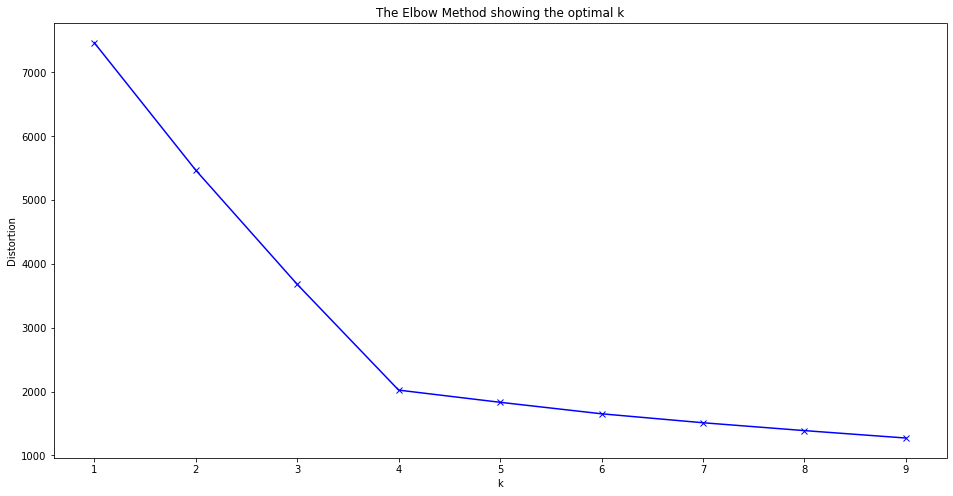

In [57]:
#Checking which number of cluster k is the best one using Elbow method 
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_kmeans)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
#Results shows that 4 clusters is the best one

In [58]:
#Also applying silhouette_score just to make sure to select the most optimal number of clusters in K-means clustering 
for i in range(2,12):
    model_10 = KMeans(n_clusters= i, random_state = 0)

    # Train the model
    model_10 = model_10.fit_predict(X_kmeans)
    score = silhouette_score(X_kmeans, model_10)

    print("The cluster ",i,"\t has the score", score)
#Silhouette_score also shows 4 clusters is the best choice  

The cluster  2 	 has the score 0.31162710123007753
The cluster  3 	 has the score 0.43340174041069524
The cluster  4 	 has the score 0.5667871661982433
The cluster  5 	 has the score 0.5044549821722181
The cluster  6 	 has the score 0.4596243185699534
The cluster  7 	 has the score 0.4469513576424662
The cluster  8 	 has the score 0.38591343946513157
The cluster  9 	 has the score 0.35225772526431687
The cluster  10 	 has the score 0.3570950239146717
The cluster  11 	 has the score 0.3709664344415596


In [59]:
#Let's see how many observations each cluster has
#can see that Cluster 2 has highest number of observations 
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_kmeans)
print(Counter(kmeans.labels_))
#There is no huge gap between the number of observations in each cluster which represents a good sign 

Counter({2: 1679, 3: 1657, 1: 1640, 0: 1594})


In [60]:
#Looking for the most frequent value in "Hour" in cluster 0
X_train_scaled['Hour'].iloc[kmeans.labels_ == 0].mode()               

0    0.304348
dtype: float64

In [61]:
#Filling the missing values in "Hour" with the most frequent value in cluster 0

X_train_scaled['Hour'].iloc[kmeans.labels_ == 0]= X_train_scaled['Hour'].iloc[kmeans.labels_ == 0].fillna(0.304348)

C:\Users\prokr\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [62]:
#Checking if missing values have been filled
X_train_scaled['Hour'].iloc[kmeans.labels_ == 0].isnull().sum()

0

In [63]:
#Looking for the most frequent value in "Hour" in cluster 1
#Here we have 2 values. First I tried to fill the missing values with the first value"0.000000", 
#but I noticed that R2 socre dropped
#So I chose to fill it with the larger value "0.913043" 
X_train_scaled['Hour'].iloc[kmeans.labels_ == 1].mode()  

0    0.000000
1    0.913043
dtype: float64

In [64]:
#Filling the missing values in "Hour" based on the larger value of the most frequent values in cluster 1

X_train_scaled['Hour'].iloc[kmeans.labels_ == 1] = X_train_scaled['Hour'].iloc[kmeans.labels_ == 1].fillna(0.913043) 

In [65]:
#Checking if missing values have been filled
X_train_scaled['Hour'].iloc[kmeans.labels_ == 1].isnull().sum()

0

In [66]:
#Looking for the most frequent value in "Hour" in cluster 2

X_train_scaled['Hour'].iloc[kmeans.labels_ == 2].mode()

0    0.608696
dtype: float64

In [67]:
#Filling the missing values in "Hour" based on the larger value of most frequent in cluster 2

X_train_scaled['Hour'].iloc[kmeans.labels_ == 2] = X_train_scaled['Hour'].iloc[kmeans.labels_ == 2].fillna(0.608696) 

In [68]:
#Checking if missing values have been filled
X_train_scaled['Hour'].iloc[kmeans.labels_ == 2].isnull().sum()

0

In [69]:
#Looking for the most frequent value in "Hour" in cluster 3
X_train_scaled['Hour'].iloc[kmeans.labels_ == 3].mode()

0    0.130435
1    0.478261
dtype: float64

In [70]:
#Filling the missing values in "Hour" based on the larger value of most frequent in cluster 3
X_train_scaled['Hour'].iloc[kmeans.labels_ == 3] = X_train_scaled['Hour'].iloc[kmeans.labels_ == 3].fillna(0.478261) 

In [71]:
#Checking if missing values have been filled
X_train_scaled['Hour'].iloc[kmeans.labels_ == 3].isnull().sum()

0

### Test Preprocessing

#### Now apply preprocessing on the testing dataset

In [72]:
#Checking if there are any duplicated values
df_RTS[df_RTr.duplicated() == True].count()

<ipython-input-72-ebe192328655>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_RTS[df_RTr.duplicated() == True].count()


Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [73]:
#Checking for nulls 
df_RTS.isnull().sum()

Hour                        61
Temperature(C)              61
Humidity(%)                 67
Wind speed (m/s)            91
Visibility (10m)            81
Dew point temperature(C)    62
Solar Radiation (MJ/m2)     56
Rainfall(mm)                76
Snowfall (cm)               44
Seasons                     60
Holiday                     67
Functioning Day             76
dtype: int64

In [74]:
#Needs to be visualized to determine the best filling method, but first the column needs to be transfomed into a numerical one
df_RTS['Holiday'].value_counts()

No Holiday    2025
Holiday         98
Name: Holiday, dtype: int64

In [75]:
#Because it's binary : Most frequent 1 and the other 0
df_RTS['Holiday'] = df_RTS['Holiday'].replace('No Holiday', 1)
df_RTS['Holiday'] = df_RTS['Holiday'].replace('Holiday', 0)

<AxesSubplot:ylabel='Density'>

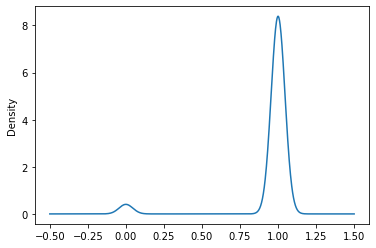

In [76]:
#Visualization of "Holiday"
df_RTS['Holiday'].plot(kind='kde')

In [77]:
#As it's right skewed replaced the missing values of this column with the median
df_RTS['Holiday']=df_RTS['Holiday'].fillna(df_RTS['Holiday'].median())

In [78]:
#Because it's binary : Most frequent 1 and the other 0
df_RTS['Functioning Day'].value_counts()

Yes    2027
No       87
Name: Functioning Day, dtype: int64

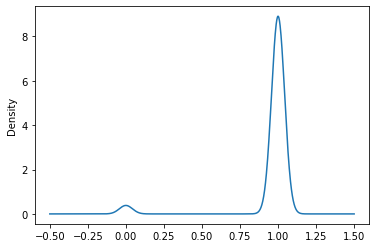

In [79]:
#Replacing and filling with median because it's right skewed
df_RTS['Functioning Day'] = df_RTS['Functioning Day'].replace('Yes', 1)
df_RTS['Functioning Day'] = df_RTS['Functioning Day'].replace('No', 0)
df_RTS['Functioning Day'].plot(kind='kde')
df_RTS['Functioning Day']=df_RTS['Functioning Day'].fillna(df_RTS['Functioning Day'].median())

<AxesSubplot:ylabel='Density'>

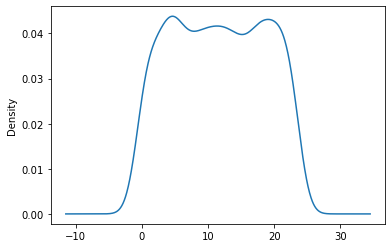

In [80]:
#Plotting the Hour column distribution to decide how to replace the missing values
#This distribution is neither normal nor skewed
#So, chose clustering to replace the missing values which will be seen below
df_RTS['Hour'].plot(kind='kde')

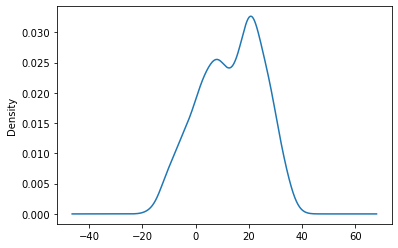

In [81]:
#Based on the distribution filling with the mean is a good choice 
df_RTS['Temperature(C)'].plot(kind='kde')
df_RTS['Temperature(C)']=df_RTS['Temperature(C)'].fillna(df_RTS['Temperature(C)'].mean())

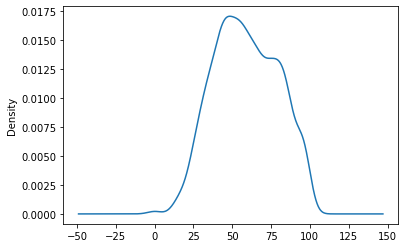

In [82]:
#Based on the distribution filling with the mean is a good choice 
df_RTS['Humidity(%)'].plot(kind='kde')
df_RTS['Humidity(%)']=df_RTS['Humidity(%)'].fillna(df_RTS['Humidity(%)'].mean())

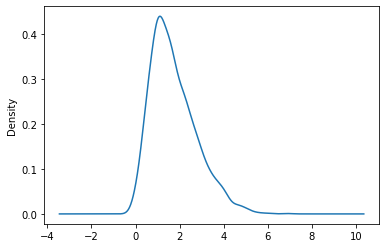

In [83]:
#Skewed to the left, filling with Median 
df_RTS['Wind speed (m/s)'].plot(kind='kde')
df_RTS['Wind speed (m/s)']=df_RTS['Wind speed (m/s)'].fillna(df_RTS['Wind speed (m/s)'].median())

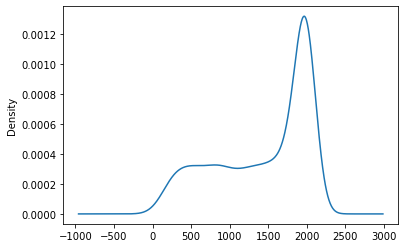

In [84]:
#Skewed to the right , filling with Median
df_RTS['Visibility (10m)'].plot(kind='kde')
df_RTS['Visibility (10m)']=df_RTS['Visibility (10m)'].fillna(df_RTS['Visibility (10m)'].median())

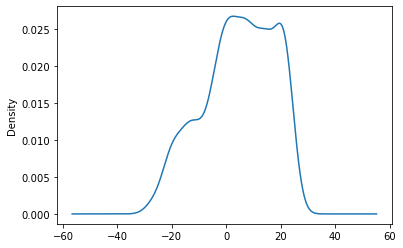

In [85]:
#Based on the distribution filling with the "Mean" is a good choice 
df_RTS['Dew point temperature(C)'].plot(kind='kde')
df_RTS['Dew point temperature(C)']=df_RTS['Dew point temperature(C)'].fillna(df_RTS['Dew point temperature(C)'].mean())

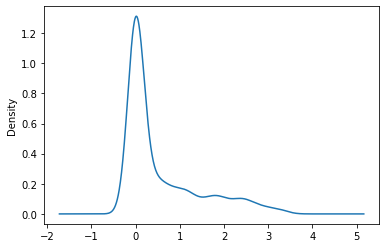

In [86]:
#It's skewed to the left, so it will be filled with "Median"
df_RTS['Solar Radiation (MJ/m2)'].plot(kind='kde')
df_RTS['Solar Radiation (MJ/m2)']=df_RTS['Solar Radiation (MJ/m2)'].fillna(df_RTS['Solar Radiation (MJ/m2)'].median())

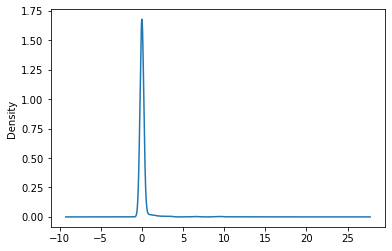

In [87]:
#It's skewed to the left, so it will be filled with "Median"
df_RTS['Rainfall(mm)'].plot(kind='kde')
df_RTS['Rainfall(mm)']= df_RTS['Rainfall(mm)'].fillna(df_RTS['Rainfall(mm)'].median())

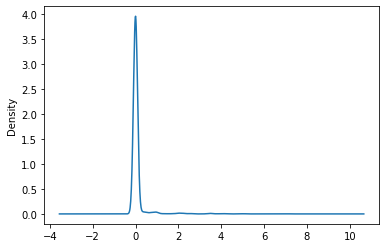

In [88]:
#It's skewed to left, so it will be filled with "Median"
df_RTS['Snowfall (cm)'].plot(kind='kde')
df_RTS['Snowfall (cm)']= df_RTS['Snowfall (cm)'].fillna(df_RTS['Snowfall (cm)'].median())

In [89]:
#Checking which columns still have missing values
df_RTS.isnull().sum()
#Hour & Seasons still have nulls                

Hour                        61
Temperature(C)               0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(C)     0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                     60
Holiday                      0
Functioning Day              0
dtype: int64

In [90]:
#Before building K-Means, scaling is an important step since K-Means model methods based on measures of how far apart the data points are
#Dropping "Seasons"  since it's categorical
X_test = df_RTS.drop('Seasons', axis =1)

In [91]:
#Scaling the data using MinMaxScaler
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test),columns= X_test.columns)

In [92]:
#Adding Seasons again in the dataframe, so that K-means can be applied
X_test_scaled['Seasons']= df_RTS['Seasons']

In [93]:
#Just Checking
X_test_scaled

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons
0,0.130435,0.498252,0.744898,0.188406,1.000000,0.620751,0.000000,0.0,0.000000,1.0,1.0,Spring
1,0.086957,0.690559,0.795918,0.144928,1.000000,0.828265,0.000000,0.0,0.000000,1.0,1.0,Autumn
2,0.739130,0.374126,0.663265,0.217391,0.524075,0.472272,0.008721,0.0,0.056338,1.0,1.0,Winter
3,0.956522,0.141608,0.520408,0.405797,1.000000,0.593452,0.000000,0.0,0.000000,1.0,1.0,Winter
4,0.652174,0.898601,0.591837,0.521739,0.720223,0.944544,0.575581,0.0,0.000000,1.0,1.0,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...
2185,0.826087,0.284965,0.826531,0.260870,0.366954,0.436494,0.000000,0.0,0.309859,1.0,1.0,Winter
2186,0.173913,0.606643,0.642857,0.144928,1.000000,0.688730,0.000000,0.0,0.000000,1.0,1.0,Summer
2187,0.608696,0.875874,0.357143,0.260870,0.484034,0.778175,0.787791,0.0,0.000000,1.0,1.0,Summer
2188,0.521739,0.554196,0.510204,0.594203,0.981754,0.577818,0.622093,0.0,0.000000,1.0,0.0,Autumn


In [94]:
#New variable without columns that need to be filled 
X_kmeans=X_test_scaled.drop(['Seasons','Hour'], axis =1)

In [95]:
#Just Checking
X_kmeans

,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day
0,0.498252,0.744898,0.188406,1.000000,0.620751,0.000000,0.0,0.000000,1.0,1.0
1,0.690559,0.795918,0.144928,1.000000,0.828265,0.000000,0.0,0.000000,1.0,1.0
2,0.374126,0.663265,0.217391,0.524075,0.472272,0.008721,0.0,0.056338,1.0,1.0
3,0.141608,0.520408,0.405797,1.000000,0.593452,0.000000,0.0,0.000000,1.0,1.0
4,0.898601,0.591837,0.521739,0.720223,0.944544,0.575581,0.0,0.000000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2185,0.284965,0.826531,0.260870,0.366954,0.436494,0.000000,0.0,0.309859,1.0,1.0
2186,0.606643,0.642857,0.144928,1.000000,0.688730,0.000000,0.0,0.000000,1.0,1.0
2187,0.875874,0.357143,0.260870,0.484034,0.778175,0.787791,0.0,0.000000,1.0,1.0
2188,0.554196,0.510204,0.594203,0.981754,0.577818,0.622093,0.0,0.000000,1.0,0.0


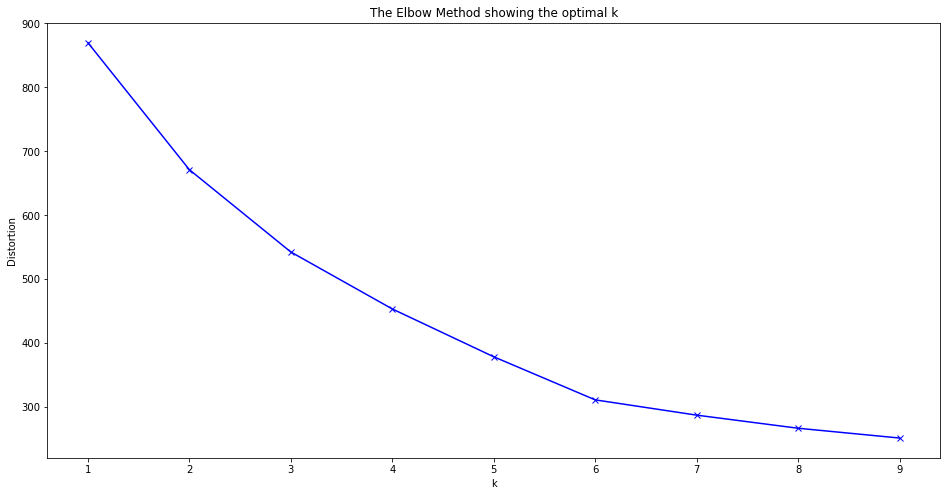

In [96]:
#Finding the best K using Elbow method
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_kmeans)
    
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
#Cluster number 6 is the best choice

In [97]:
#Using  silhouette_score to find the best K
for i in range(2,12):
    model_10 = KMeans(n_clusters= i, random_state = 0)

    # Train the model
    model_10 = model_10.fit_predict(X_kmeans)
    score = silhouette_score(X_kmeans, model_10)

    print("The cluster ",i,"\t has the score", score)
#According to silhouette_score also, 6 clusters is the best choice

The cluster  2 	 has the score 0.24071566319523774
The cluster  3 	 has the score 0.2579514241344929
The cluster  4 	 has the score 0.27852441981739773
The cluster  5 	 has the score 0.3017872177102872
The cluster  6 	 has the score 0.3252475874142941
The cluster  7 	 has the score 0.2949636264421592
The cluster  8 	 has the score 0.25327288588552443
The cluster  9 	 has the score 0.2492787919141302
The cluster  10 	 has the score 0.2377660776337399
The cluster  11 	 has the score 0.23482831508575988


In [98]:
#Building KMeans model with 6 Clusters 
kmeans = KMeans(n_clusters=6, random_state=0).fit(X_kmeans)
print(Counter(kmeans.labels_))

Counter({1: 589, 0: 559, 4: 539, 2: 321, 5: 95, 3: 87})


In [99]:
#Checking value_counts of cluster 0
X_test_scaled['Seasons'].iloc[kmeans.labels_ == 0].value_counts()                

Spring    194
Summer    129
Winter    128
Autumn     95
Name: Seasons, dtype: int64

In [100]:
#Filling nulls with the most frequent one
X_test_scaled['Seasons'].iloc[kmeans.labels_ == 0]= X_test_scaled['Seasons'].iloc[kmeans.labels_ == 0].fillna('Spring')

C:\Users\prokr\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [101]:
#Checking value_counts of cluster 1
X_test_scaled['Seasons'].iloc[kmeans.labels_ == 1].value_counts()                

Summer    281
Autumn    179
Spring    116
Winter      1
Name: Seasons, dtype: int64

In [102]:
#Filling nulls with the most frequent one
X_test_scaled['Seasons'].iloc[kmeans.labels_ == 1]= X_test_scaled['Seasons'].iloc[kmeans.labels_ == 1].fillna('Summer')

In [103]:
#Checking value_counts of cluster 2
X_test_scaled['Seasons'].iloc[kmeans.labels_ == 2].value_counts()                

Summer    138
Spring     90
Autumn     75
Winter      9
Name: Seasons, dtype: int64

In [104]:
#Filling nulls with the most frequent one
X_test_scaled['Seasons'].iloc[kmeans.labels_ == 2]= X_test_scaled['Seasons'].iloc[kmeans.labels_ == 2].fillna('Summer')

In [105]:
#Checking value_counts of cluster 3
X_test_scaled['Seasons'].iloc[kmeans.labels_ == 3].value_counts()                

Autumn    66
Spring    17
Name: Seasons, dtype: int64

In [106]:
#Filling nulls with the most frequent one
X_test_scaled['Seasons'].iloc[kmeans.labels_ == 3]= X_test_scaled['Seasons'].iloc[kmeans.labels_ == 3].fillna('Autumn')

In [107]:
#Checking value_counts of cluster 4
X_test_scaled['Seasons'].iloc[kmeans.labels_ == 4].value_counts()   

Winter    336
Spring    101
Autumn     83
Name: Seasons, dtype: int64

In [108]:
#Filling nulls with the most frequent one
X_test_scaled['Seasons'].iloc[kmeans.labels_ == 4]= X_test_scaled['Seasons'].iloc[kmeans.labels_ == 4].fillna('Winter')

In [109]:
#Checking value_counts of cluster 5
X_test_scaled['Seasons'].iloc[kmeans.labels_ == 5].value_counts() 

Winter    40
Autumn    26
Spring    18
Summer     8
Name: Seasons, dtype: int64

In [110]:
#Filling nulls with the most frequent one
X_test_scaled['Seasons'].iloc[kmeans.labels_ == 5]= X_test_scaled['Seasons'].iloc[kmeans.labels_ == 5].fillna('Winter')

In [111]:
#Checking if there is any nulls in the entire column
X_test_scaled['Seasons'].isnull().sum()

0

In [112]:
#Now transforming the categorical data into normerical using One Hot Vector method
X_test_scaled = pd.concat([X_test_scaled, pd.get_dummies(X_test_scaled['Seasons'])], axis=1)

In [113]:
#Dropping the Seasons column
X_test_scaled=X_test_scaled.drop('Seasons', axis=1)

### Filling missing values for Hour

In [114]:
#Dropping the column with missing value first
X_kmeans = X_test_scaled.drop(['Hour'], axis=1)

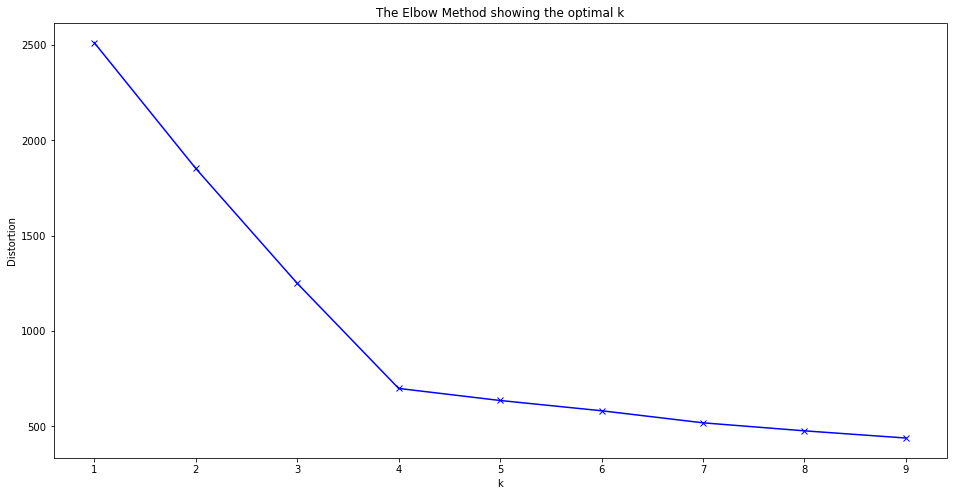

In [115]:
#Finding best K using Elbow method
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_kmeans)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
#CLuster number 4 is the best choice

In [116]:
#Silhouette_score for best K
for i in range(2,12):
    model_10 = KMeans(n_clusters= i, random_state = 0)

    # Train the model
    model_10 = model_10.fit_predict(X_kmeans)
    score = silhouette_score(X_kmeans, model_10)
    print("The cluster ",i,"\t has the score", score)
#Same result with silhouette_score 

The cluster  2 	 has the score 0.3006954671901457
The cluster  3 	 has the score 0.4287766469980061
The cluster  4 	 has the score 0.5597401667058821
The cluster  5 	 has the score 0.5122696096302075
The cluster  6 	 has the score 0.49781872993893606
The cluster  7 	 has the score 0.44014248170483417
The cluster  8 	 has the score 0.37526359866066195
The cluster  9 	 has the score 0.33845148105175765
The cluster  10 	 has the score 0.3475003890634842
The cluster  11 	 has the score 0.397060745635611


In [117]:
#Building the model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_kmeans)
print(Counter(kmeans.labels_))

Counter({1: 577, 2: 549, 3: 536, 0: 528})


In [118]:
#Finding the most frequent value
X_test_scaled['Hour'].iloc[kmeans.labels_ == 0].mode()                

0    0.869565
dtype: float64

In [119]:
#Filling with the most frequnt one
X_test_scaled['Hour'].iloc[kmeans.labels_ == 0]= X_test_scaled['Hour'].iloc[kmeans.labels_ == 0].fillna(0.869565)

C:\Users\prokr\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [120]:
#Checking for nulls
X_test_scaled['Hour'].iloc[kmeans.labels_ == 0].isnull().sum()

0

In [121]:
#Finding the most frequent value
X_test_scaled['Hour'].iloc[kmeans.labels_ == 1].mode()                

0    0.130435
1    0.782609
dtype: float64

In [122]:
#Filling with the most frequnt one
X_test_scaled['Hour'].iloc[kmeans.labels_ == 1]= X_test_scaled['Hour'].iloc[kmeans.labels_ == 1].fillna(0.782609)

In [123]:
#Checking for nulls
X_test_scaled['Hour'].iloc[kmeans.labels_ == 1].isnull().sum()

0

In [124]:
#Finding the most frequent value
X_test_scaled['Hour'].iloc[kmeans.labels_ == 2].mode()                

0    0.869565
dtype: float64

In [125]:
#Filling with the most frequnt one
X_test_scaled['Hour'].iloc[kmeans.labels_ == 2]= X_test_scaled['Hour'].iloc[kmeans.labels_ == 2].fillna(0.869565)

In [126]:
#Checking for nulls
X_test_scaled['Hour'].iloc[kmeans.labels_ == 2].isnull().sum()

0

In [127]:
#Finding the most frequent value
X_test_scaled['Hour'].iloc[kmeans.labels_ == 3].mode()                

0    0.565217
dtype: float64

In [128]:
#Filling with the most frequnt one
X_test_scaled['Hour'].iloc[kmeans.labels_ == 3]= X_test_scaled['Hour'].iloc[kmeans.labels_ == 3].fillna(0.565217)

In [129]:
#Checking for nulls
X_test_scaled['Hour'].iloc[kmeans.labels_ == 3].isnull().sum()

0

### Regression model training

In [130]:
# Split the Training data into Validation and Training
from sklearn.model_selection import train_test_split
Xr_train , Xr_valid , yr_train, yr_valid = train_test_split(X_train_scaled, y, train_size=0.75, random_state = 0)

In [131]:
#Building the first model with LinearRegression and training the traing dataset
from sklearn.linear_model import LinearRegression
model_l = LinearRegression() 
model_l.fit(Xr_train, yr_train)

LinearRegression()

### Regression prediction

In [132]:
#Predicting the Training datset
pred = model_l.predict(Xr_train)

In [133]:
#Checking score of traing 
#Since R2 squared is the best method to evaluate regression 
#apply it here 
from sklearn.metrics import r2_score
r2_score(yr_train, pred)
#0.538 is not good score 

0.5384531569232388

In [134]:
#Now predicting the hidden validation data
pred_new = model_l.predict(Xr_valid)

In [135]:
#Checking the score
from sklearn.metrics import r2_score
r2_score(yr_valid, pred_new)
#No difference between training and validation

0.5143138925205976

### Predict the new target using Linear Regression

In [136]:
#Predicting new data
pred_new = model_l.predict(X_test_scaled)

In [137]:
#The predicted data
pred_new

array([ 412.,  740.,  416., ..., 1356.,   46., 1178.])

### GridSearchCV

### DecisionTreeRegressor

In [138]:
#GridSearchCV is a library function that is a member of sklearn's model_selection package.
#It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. 
#So, in the end, you can select the best parameters from the listed hyperparameters
from sklearn import tree
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV


parameters = {'max_depth':range(3,20),"max_features":["auto","log2","sqrt",None]}
clf = GridSearchCV(tree.DecisionTreeRegressor(), parameters, n_jobs=4)
clf.fit(X=Xr_train, y=yr_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.7671482440185365 {'max_depth': 9, 'max_features': 'auto'}


In [139]:
#Based on GridSearchCV best depth is 9 
from sklearn.tree import DecisionTreeRegressor
regr_2 = DecisionTreeRegressor(max_depth=9,max_features= 'auto')
regr_2.fit(Xr_train, yr_train)

DecisionTreeRegressor(max_depth=9, max_features='auto')

In [140]:
#Let's predict the training data
pred = regr_2.predict(Xr_train)

In [141]:
#R squared has increased with DecisionTreeRegressor "Good"
r2_score(yr_train, pred)

0.8641157458906517

In [142]:
#Let's see the validation R squared score
pred_new = regr_2.predict(Xr_valid)
r2_score(yr_valid, pred_new)
#It's also good and there is no big gap between training and validation
#DecisionTreeRegressor is better than linear regression to predict this data

0.7809223542883514

### Regression prediction using DecisionTreeRegressor

In [143]:
#Let's predict the new testing data using DecisionTreeRegressor
pred_new = regr_2.predict(X_test_scaled)

In [144]:
#New predicted data
pred_new

array([ 245.63636364,  523.875     ,  337.86493506, ..., 1014.875     ,
          0.        , 1142.83333333])

__________________________________________________________________________________________________________________________

# Classification

### Data preparation

In [145]:
#Importing the csv files
df_cl= pd.read_csv("train_classification.csv")
df_clt= pd.read_csv("test_classification.csv")

In [146]:
#Exploring the dataset
df_cl
#There are some categorical values 

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,39,f,46.4,59.2,14.1,18.9,4.5,7.90,4.55,61.0,14.5,77.3,0=Blood Donor
1,37,m,46.1,44.3,42.7,26.5,6.4,10.86,5.05,74.0,22.2,73.1,0=Blood Donor
2,32,m,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3,0=Blood Donor
3,46,f,36.7,62.3,10.8,17.4,3.7,6.17,4.07,67.0,15.1,69.0,0=Blood Donor
4,56,m,23.0,105.6,5.1,123.0,43.0,1.80,2.40,62.7,35.9,62.8,3=Cirrhosis
...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,60,m,40.4,46.8,17.7,25.7,13.5,5.79,5.42,92.0,19.2,70.0,0=Blood Donor
549,32,m,42.4,86.3,20.3,20.0,35.2,5.46,4.45,81.0,15.9,69.9,0=Blood Donor
550,38,f,40.0,73.5,16.6,19.2,8.3,5.23,5.52,54.0,24.0,71.0,0=Blood Donor
551,49,m,44.3,84.1,29.0,29.0,16.2,8.18,4.65,87.0,21.9,70.8,0=Blood Donor


In [147]:
#Exploring
df_cl.describe()
#No outliers based on max and min

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,553.000000,552.000000,536.000000,552.000000,553.000000,553.000000,553.000000,544.000000,553.000000,553.000000,552.000000
mean,47.459313,41.641123,67.962127,28.574457,34.576492,11.314828,8.170253,5.360809,79.782098,38.938336,71.962500
std,10.202420,5.843118,26.643695,25.308527,30.292877,18.839697,2.196384,1.123139,30.358409,53.895354,5.506352
min,19.000000,14.900000,11.300000,0.900000,10.600000,1.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.875000,52.275000,16.475000,21.700000,5.400000,6.940000,4.617500,67.000000,15.800000,69.200000
50%,47.000000,42.000000,65.550000,23.000000,26.200000,7.300000,8.180000,5.300000,77.000000,23.300000,72.000000
75%,55.000000,45.225000,80.125000,33.200000,33.000000,11.500000,9.570000,6.060000,88.000000,40.100000,75.325000
max,77.000000,82.200000,416.600000,325.300000,319.800000,254.000000,16.410000,9.670000,519.000000,650.900000,90.000000


##### Start cleaning

In [148]:
#Checking if there are any duplicated values
df_cl[df_cl.duplicated() == True].count()
#NO duplicated values !!

Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
Category    0
dtype: int64

In [149]:
#Checking for nulls
df_cl.isnull().sum()

Age          0
Sex          0
ALB          1
ALP         17
ALT          1
AST          0
BIL          0
CHE          0
CHOL         9
CREA         0
GGT          0
PROT         1
Category     0
dtype: int64

<AxesSubplot:ylabel='Density'>

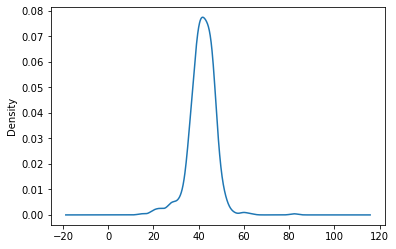

In [150]:
#Visualization in order to determine the best filling method for ALB column
df_cl['ALB'].plot(kind='kde')

In [151]:
#Based on the distribution, mean is the best method to fill nulls
df_cl['ALB']=df_cl['ALB'].fillna(df_cl['ALB'].mean())

<AxesSubplot:ylabel='Density'>

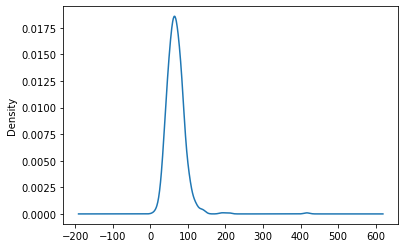

In [152]:
#Visualizing data
df_cl['ALP'].plot(kind='kde')

In [153]:
#Based on the distributin, Median is best the method to fill nulls
df_cl['ALP']=df_cl['ALP'].fillna(df_cl['ALP'].median())

<AxesSubplot:ylabel='Density'>

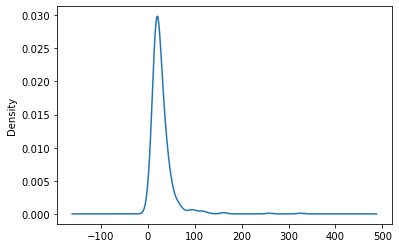

In [154]:
#Visualization in order to determine the best filling method for ALT column
df_cl['ALT'].plot(kind='kde')

In [155]:
#Based on the distribution, mean is the best method to fill nulls
df_cl['ALT']=df_cl['ALT'].fillna(df_cl['ALT'].median())

<AxesSubplot:ylabel='Density'>

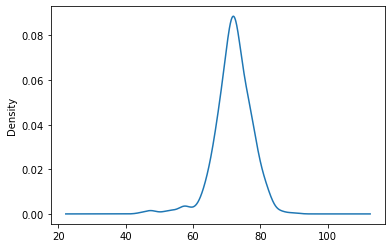

In [156]:
#Visualization in order to see the best filling method for PROT column
df_cl['PROT'].plot(kind='kde')

In [157]:
#Median is the best filling method based on the distribution
df_cl['PROT']=df_cl['PROT'].fillna(df_cl['PROT'].median())

<AxesSubplot:ylabel='Density'>

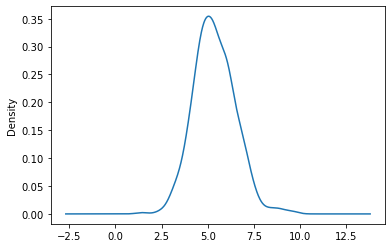

In [158]:
#Visualizing CHOL 
df_cl['CHOL'].plot(kind='kde')

In [159]:
#Mean is the best filling method based on the distribution
df_cl['CHOL']=df_cl['CHOL'].fillna(df_cl['CHOL'].mean())

In [160]:
#Do we still have nulls?
df_cl.isnull().sum()
#NO :)

Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
Category    0
dtype: int64

##### Let's start categorical data transormation 

In [161]:
#Value counts of Category column
df_cl['Category'].value_counts()

0=Blood Donor             478
3=Cirrhosis                26
1=Hepatitis                22
2=Fibrosis                 21
0s=suspect Blood Donor      6
Name: Category, dtype: int64

In [162]:
#Replacing the categorical data with with the range 0-4 because it's ordinal 
df_cl['Category']= df_cl['Category'].replace('0=Blood Donor',0)
df_cl['Category']= df_cl['Category'].replace('3=Cirrhosis',3)
df_cl['Category']= df_cl['Category'].replace('1=Hepatitis',1)
df_cl['Category']= df_cl['Category'].replace('2=Fibrosis',2)
df_cl['Category']= df_cl['Category'].replace('0s=suspect Blood Donor',4)

In [163]:
#Value counts after the transformation
df_cl['Category'].value_counts()

0    478
3     26
1     22
2     21
4      6
Name: Category, dtype: int64

##### Test preprocessing

In [164]:
#Exploring
df_clt 

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,36,m,47.8,89.0,48.5,38.4,8.6,8.26,5.62,96.0,21.9,76.2
1,56,f,45.1,79.1,39.0,30.5,5.2,6.47,5.10,64.0,145.3,66.7
2,51,m,45.9,66.7,31.8,28.1,9.0,10.08,5.61,85.0,36.2,73.0
3,55,m,44.7,71.6,22.9,22.1,5.5,6.82,4.61,105.0,59.2,72.7
4,45,m,43.2,68.2,27.8,42.3,6.6,10.93,6.61,105.0,27.2,74.5
...,...,...,...,...,...,...,...,...,...,...,...,...
57,33,f,40.6,73.7,12.6,16.3,3.1,7.75,6.36,67.0,19.5,71.4
58,55,m,47.3,106.0,208.8,130.6,0.8,14.80,8.08,76.0,71.6,78.3
59,38,m,48.4,44.9,23.4,22.1,7.9,10.53,7.51,87.0,43.2,82.6
60,36,f,42.7,55.1,12.4,16.0,6.8,6.63,5.05,75.0,10.4,72.8


In [165]:
#Exploring
df_clt.describe()
#The data looks good

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,62.000000,62.000000,61.000000,62.000000,62.000000,62.000000,62.000000,61.000000,62.000000,62.000000,62.000000
mean,46.951613,41.433871,71.111475,27.350000,36.658065,12.127419,8.431935,5.433115,94.717742,44.838710,72.770968
std,8.690352,5.230990,19.765948,27.053455,52.093420,26.138867,2.291611,1.222889,127.965635,61.295967,4.341617
min,32.000000,26.200000,27.300000,2.300000,15.000000,0.800000,1.720000,2.860000,52.000000,7.400000,57.000000
25%,39.000000,38.625000,59.400000,15.100000,20.400000,4.300000,6.965000,4.510000,68.000000,15.625000,70.275000
50%,48.000000,41.550000,69.400000,21.700000,24.300000,6.700000,8.745000,5.300000,75.000000,25.350000,72.950000
75%,53.000000,45.175000,79.100000,31.250000,30.350000,10.000000,9.670000,6.170000,85.000000,42.500000,75.925000
max,68.000000,53.000000,145.000000,208.800000,324.000000,200.000000,14.800000,8.800000,1079.100000,392.200000,82.600000


In [166]:
#Checking if there are any duplicated values
df_clt[df_clt.duplicated() == True].count()
#NO duplicated values !!

Age     0
Sex     0
ALB     0
ALP     0
ALT     0
AST     0
BIL     0
CHE     0
CHOL    0
CREA    0
GGT     0
PROT    0
dtype: int64

In [167]:
#Checking for nulls
df_clt.isnull().sum()
#Just two null values 

Age     0
Sex     0
ALB     0
ALP     1
ALT     0
AST     0
BIL     0
CHE     0
CHOL    1
CREA    0
GGT     0
PROT    0
dtype: int64

<AxesSubplot:ylabel='Density'>

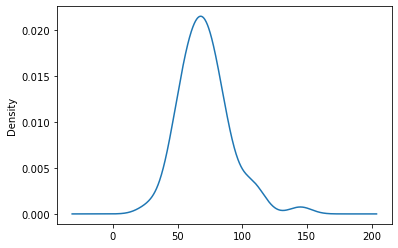

In [168]:
#Visualizing ALP to see the distribution 
df_clt['ALP'].plot(kind='kde')

In [169]:
#Because it looks like normal distribution. It will be filled with mean
df_clt['ALP']=df_clt['ALP'].fillna(df_clt['ALP'].mean())

<AxesSubplot:ylabel='Density'>

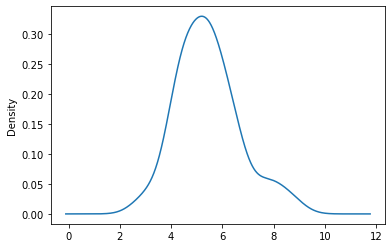

In [170]:
#Visualizing CHOL
df_clt['CHOL'].plot(kind='kde')

In [171]:
#Because it looks like normal distribution. It will be filled with mean
df_clt['CHOL']=df_clt['CHOL'].fillna(df_clt['CHOL'].mean())

In [172]:
df_clt.isnull().sum()
#All nulls have been filled

Age     0
Sex     0
ALB     0
ALP     0
ALT     0
AST     0
BIL     0
CHE     0
CHOL    0
CREA    0
GGT     0
PROT    0
dtype: int64

In [173]:
#Starting the transformation of Categorical data
df_cl['Sex'].value_counts()
#It's binary, so replacing it with 0 and 1 for training data

m    343
f    210
Name: Sex, dtype: int64

In [174]:
#Most freqent with 1 and the other with 0
df_cl['Sex'] =  df_cl['Sex'].replace('m',1)
df_cl['Sex'] =  df_cl['Sex'].replace('f',0)

In [175]:
#Same transformation for testing data
df_clt['Sex'].value_counts()

m    34
f    28
Name: Sex, dtype: int64

In [176]:
#It's binary, so replacing it with 0 and 1 for training data
df_clt['Sex'] =  df_clt['Sex'].replace('m',1)
df_clt['Sex'] =  df_clt['Sex'].replace('f',0)

In [177]:
#Splitting the features X and the target y
X_train = df_cl.drop('Category', axis=1)
X_test = df_clt
y = df_cl['Category']

### AgglomerativeClustering
###### Part of  EDA

##### Since AgglomerativeClustering model is based on distance measure, Scaling is important

In [178]:
#Scaling for both testing and training data
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns= X_train.columns)
X_test_scaled =  pd.DataFrame(scaler.fit_transform(X_test),columns= X_test.columns)

In [179]:
#Find the best k clusters using silhouette_score
from sklearn.cluster import AgglomerativeClustering

for i in range(2,12):
    model_10 = AgglomerativeClustering(n_clusters= i)

    # Train the model
    model_10 = model_10.fit_predict(X_train_scaled)
    score = silhouette_score(X_train_scaled, model_10)

    print("The cluster ",i,"\t has the score", score)
#Best clusters is 2

The cluster  2 	 has the score 0.5956329532132907
The cluster  3 	 has the score 0.5471427364001749
The cluster  4 	 has the score 0.3495828443178072
The cluster  5 	 has the score 0.334590357389118
The cluster  6 	 has the score 0.16424209786810828
The cluster  7 	 has the score 0.17028474491388645
The cluster  8 	 has the score 0.17471652927612283
The cluster  9 	 has the score 0.16460794406263746
The cluster  10 	 has the score 0.16716626073027194
The cluster  11 	 has the score 0.16882417556011045


In [180]:
# Building the model
#chose 'ward' after trying differernt linkage, and found that ward is the best one for this model
model = AgglomerativeClustering( linkage = 'ward')

model = model.fit(X_train_scaled)
print(model.labels_)

[1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1
 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0
 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1
 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1
 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1
 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1
 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0
 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0
 1 1 0 0 0 0 0 0 0 1 0 0 

In [181]:
#Number of data in each cluster
from collections import Counter
print(Counter(model.labels_))

Counter({0: 344, 1: 209})


In [182]:
#Check Age mean in cluster 0
X_train_scaled[model.labels_==0].Age.mean() 

0.4861668003207701

In [183]:
#Checking Age mean in cluster 1 
#There is a slight different between Age in Group 0 & Group 1
#The mean age in Group 1 is larger than Group 0 
X_train_scaled[model.labels_==1].Age.mean()

0.49810262332948363

In [184]:
#Checking sex in cluster 0 
X_train_scaled[model.labels_==0].Sex.value_counts()
#They are all Males but one Female in group 0

1.0    343
0.0      1
Name: Sex, dtype: int64

In [185]:
#Checking sex in cluster 1
X_train_scaled[model.labels_==1].Sex.value_counts()
#They are all Females in group 1

0.0    209
Name: Sex, dtype: int64

In [186]:
#Exploring
X_train_scaled[model.labels_==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,344.0,0.486167,0.184606,0.000000,0.327586,0.465517,0.620690,1.000000
Sex,344.0,0.997093,0.053916,0.000000,1.000000,1.000000,1.000000,1.000000
ALB,344.0,0.404996,0.091286,0.000000,0.365156,0.416048,0.458024,1.000000
ALP,344.0,0.139103,0.052631,0.000000,0.103442,0.133851,0.166297,0.442635
ALT,344.0,0.093841,0.073458,0.000000,0.054562,0.077990,0.111282,0.792540
AST,344.0,0.089160,0.109901,0.000000,0.042691,0.057245,0.080935,1.000000
BIL,344.0,0.046316,0.091434,0.001983,0.016951,0.027161,0.046392,1.000000
CHE,344.0,0.467967,0.159053,0.000000,0.378753,0.476318,0.568379,1.000000
CHOL,344.0,0.472427,0.141461,0.000000,0.383192,0.469053,0.562500,1.000000
CREA,344.0,0.152976,0.070031,0.000000,0.129159,0.147750,0.166341,1.000000


In [187]:
#Exploring
X_train_scaled[model.labels_==1].describe().T
#Mean of columns has no big differnce 
#That's because we have just two groups

,count,mean,std,min,25%,50%,75%,max
Age,209.0,0.498103,0.160712,0.224138,0.379310,0.500000,0.603448,0.965517
Sex,209.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ALB,209.0,0.384744,0.077270,0.065379,0.341753,0.374443,0.427935,0.713224
ALP,209.0,0.140471,0.080927,0.028621,0.100666,0.130274,0.171231,1.000000
ALT,209.0,0.071186,0.083102,0.001233,0.042848,0.054254,0.073674,1.000000
AST,209.0,0.058424,0.070461,0.004528,0.028137,0.040103,0.057891,0.489327
BIL,209.0,0.023591,0.026463,0.000000,0.009913,0.017446,0.026566,0.227201
CHE,209.0,0.421266,0.117879,0.008005,0.345564,0.416278,0.505670,0.759173
CHOL,209.0,0.484633,0.124130,0.192961,0.395631,0.477040,0.559466,0.922330
CREA,209.0,0.119896,0.024399,0.046967,0.105675,0.117417,0.129159,0.293933


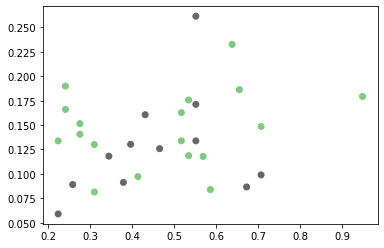

In [188]:
# Visualization of Age & ALP 
X_train_scaled[model.labels_==0].plot(kind='kde')
# Plotting
%matplotlib inline
plt.scatter(X_train_scaled['Age'][:30], X_train_scaled['ALP'][:30], c = model.labels_[:30], cmap = 'Accent')
plt.show()

##### Splitting Data

In [189]:
# Splitting the Training data into Validation and Training
from sklearn.model_selection import train_test_split
Xr_train , Xr_valid , yr_train, yr_valid = train_test_split(X_train_scaled, y, train_size=0.75, random_state = 0)

### Classification model training

### Multinomial logistic regression

In [190]:
#Building the logestic model
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(multi_class="multinomial",random_state = 0)
lreg.fit(Xr_train, yr_train)#Fitting the model

LogisticRegression(multi_class='multinomial', random_state=0)

In [191]:
#Train Score
Logistic_Regression = lreg.score(Xr_train, yr_train)
print("The accuracy is:",Logistic_Regression*100)
#Looks good

The accuracy is: 90.09661835748793


In [192]:
#Predicting the validation data result
pred = lreg.predict(Xr_valid)
pred

array([0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [193]:
#Validation Score
LogisticRegressionScore = lreg.score(Xr_valid, yr_valid)
print("The accuracy is:",LogisticRegressionScore*100)
#Comparable difference between training and validation 
#The model is good 

The accuracy is: 87.76978417266187


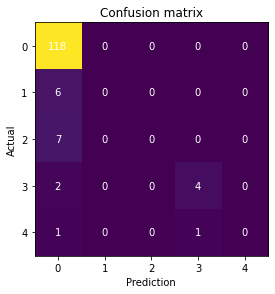

In [194]:
#Applying confusion matrix
#Confusion matrix is used to define the performance of a classification algorithm 
#Also, it is not limited to binary classification and can use it for multi-class classifiers
import seaborn as sns 

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(yr_valid, pred)

fig, ax = plt.subplots()
plt.imshow(confusion)
plt.title("Confusion matrix")

ax.set_xticks(np.arange(len(confusion)))
ax.set_yticks(np.arange(len(confusion[0])))

#Looping over data dimensions and creating text annotations.
for i in range(len(confusion)):
    for j in range(len(confusion[0])):
        text = ax.text(j, i, confusion[i, j],
                       ha="center", va="center", color="w")
fig.tight_layout()
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [195]:
#Using micro and macro methods for evaluating scoring metrics (precision, recall, f1-score)
#For multi-class classification
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import precision_score

#Macro 
#Because the dataset has uneven distribtion in which one class has higher number of obesrvations 
#And the other has low number of observation
print('Macro precision: ', precision_score(yr_valid, pred, average= 'macro'))
print('Macro recall: ', recall_score(yr_valid, pred, average= 'macro'))
print('Macro f1-score: ', f1_score(yr_valid, pred, average= 'macro'))
#Hence macro 'IS NOT TRUSTED' for imbalanced senario because it assumes the cotribtion of each class equally

#Micro is better for evaluating this model
#Micro
#Because the dataset has uneven distribtion in which one class has higher number of obesrvations 
#and the other has low number of observation, Micro can evaluate it better
print("\n")
print('Micro precision: ', precision_score(yr_valid, pred, average= 'micro'))# Average is assigned micro
print('Micro recall: ', recall_score(yr_valid, pred, average= 'micro'))
print('Micro f1-score: ', f1_score(yr_valid, pred, average= 'micro'))

Macro precision:  0.3361194029850746
Macro recall:  0.3333333333333333
Macro f1-score:  0.3327561327561327


Micro precision:  0.8776978417266187
Micro recall:  0.8776978417266187
Micro f1-score:  0.8776978417266187


C:\Users\prokr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Predicting Testing Data Using Multinomial logistic regression

In [196]:
#The predicted data
lreg.predict(X_test_scaled)

array([0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Decision Tree Classifier Model

In [197]:
#GridSearchCV is a library function that is a member of sklearn's model_selection package.
#It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. 
#So, in the end, you can select the best parameters from the listed hyperparameters
from sklearn import tree
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV


parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=Xr_train, y=yr_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.9131354687040847 {'max_depth': 4}


C:\Users\prokr\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [198]:
#Building the model
#Based on GridSearchCV the best depth is 4
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4)
#Fitting the model
model.fit(Xr_train, yr_train)

DecisionTreeClassifier(max_depth=4)

In [199]:
#Checking the accuracy for training dataset for DecisionTreeClassifier
from sklearn import metrics 
pred_t = model.predict(Xr_train)
print("Accuracy of Training:",metrics.accuracy_score(yr_train,pred_t))
#Better than Logestic model 

Accuracy of Training: 0.9710144927536232


In [200]:
#Predicting the validation data
pred1 = model.predict(Xr_valid)

In [201]:
from sklearn import metrics #Importing scikit-learn metrics module for accuracy calculation
#Checking the accuracy for DecisionTreeClassifier for validation 
print("Accuracy of Validation:",metrics.accuracy_score(yr_valid,pred1 ))
#It is also better than Logestic model, and no huge differece between training and testing score
#This model is better 

Accuracy of Validation: 0.8920863309352518


In [202]:
#Evaluation
#Micro
print('Micro recall: ', precision_score(yr_valid, pred1, average= 'micro'))
print('Micro recall: ', recall_score(yr_valid, pred1, average= 'micro'))
print('Micro f1-score: ', f1_score(yr_valid, pred1, average= 'micro'))

Micro recall:  0.8920863309352518
Micro recall:  0.8920863309352518
Micro f1-score:  0.8920863309352518


### Predicting Test Data Using DecisionTreeClassifier

In [203]:
#The predicted data
pred_test = model.predict(X_test_scaled)
pred_test

array([1, 0, 0, 0, 0, 3, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 3,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1, 1, 0], dtype=int64)

### Classification Using Random Forest

In [204]:
#Building the model
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier()

In [205]:
#Fitting the training data
rand_forest.fit(Xr_train, yr_train)

RandomForestClassifier()

In [206]:
#Training score
prediction = rand_forest.predict(Xr_train)
print("Accuracy of Training :",metrics.accuracy_score(yr_train,prediction ))

Accuracy of Training : 1.0


In [207]:
#Validation score
prediction = rand_forest.predict(Xr_valid)
print("Accuracy of Validation:",metrics.accuracy_score(yr_valid,prediction ))

Accuracy of Validation: 0.9136690647482014


In [208]:
#Training Evalation 
#Micro
print("Validation Evaluation: \n")
print('Micro recall: ', precision_score(yr_valid, prediction, average= 'micro'))
print('Micro recall: ', recall_score(yr_valid, prediction, average= 'micro'))
print('Micro f1-score: ', f1_score(yr_valid, prediction, average= 'micro'))

#Random Forest is the best model to predict this data

Validation Evaluation: 

Micro recall:  0.9136690647482014
Micro recall:  0.9136690647482014
Micro f1-score:  0.9136690647482014


### Classification Prediction Using Random Forest

In [209]:
#Predicted data
prediction  = rand_forest.predict(X_test_scaled)
prediction

array([0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Team Members 
- Fatimah Alanazi 11393864
- Tasmia Hoque 11422467 
- Bernardo Rodriguez Palacios 11231623
- Mariam Alhawiti 11468533